
=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

/tmp/ipykernel_843535/935357459.py:413: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_843535/935357459.py:431: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()


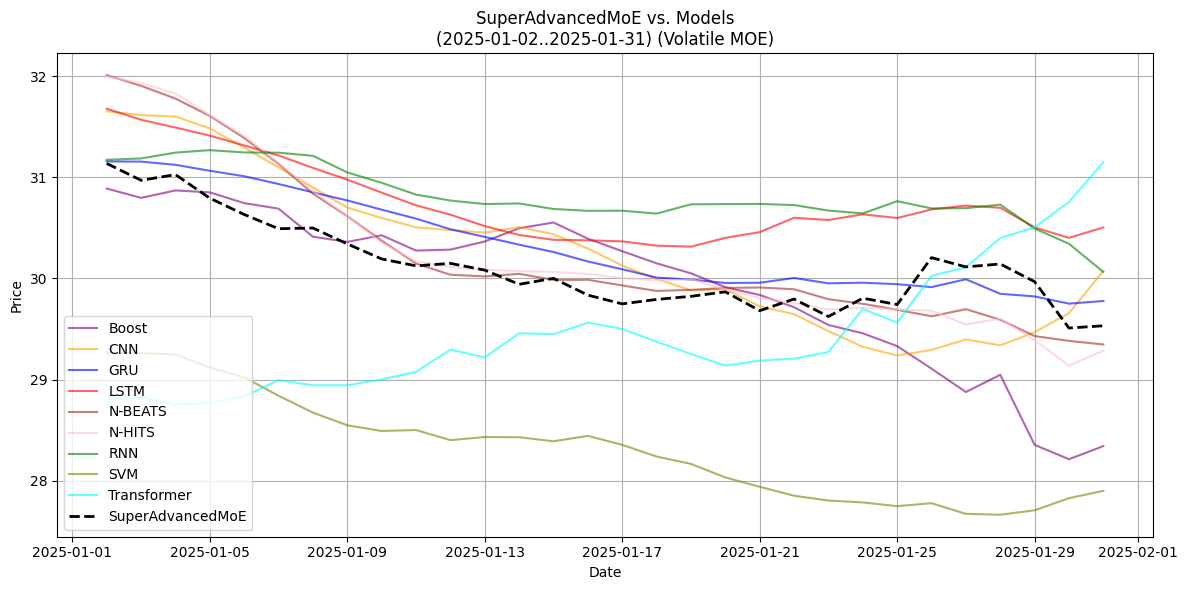

/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

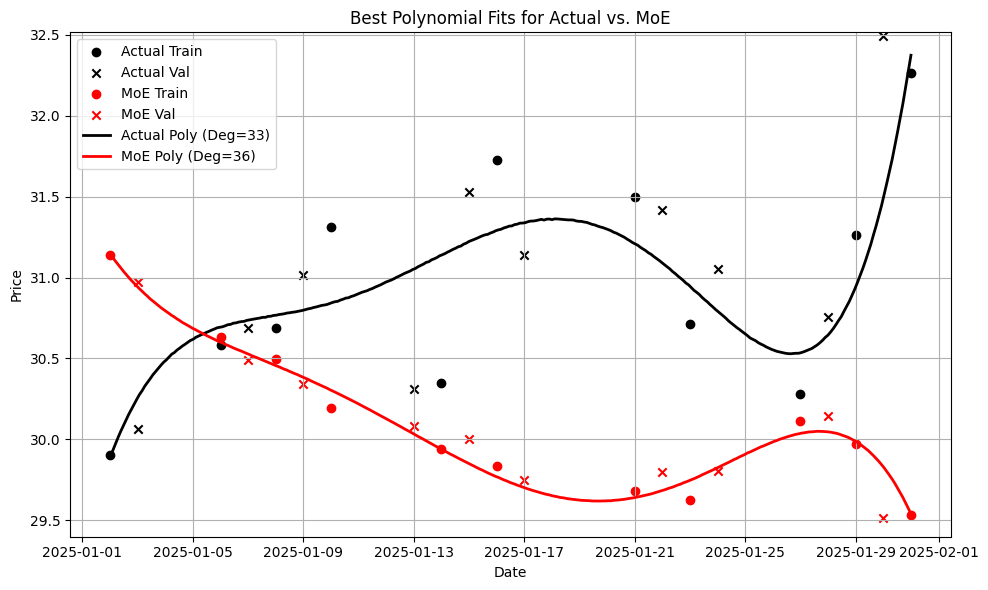


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=0.196528
     y = 3.1306e-130*x^33+5.7268e-127*x^32-5.2944e-122*x^31-1.6228e-117*x^30-3.3030e-113*x^29-5.3272e-109*x^28-6.4770e-105*x^27-3.8701e-101*x^26+1.1066e-96*x^25+5.3698e-92*x^24+1.5450e-87*x^23+3.5944e-83*x^22+7.3665e-79*x^21+1.3457e-74*x^20+2.1904e-70*x^19+2.8363e-66*x^18+1.8197e-62*x^17-3.9173e-58*x^16-2.2837e-53*x^15-7.0772e-49*x^14-1.7832e-44*x^13-3.9486e-40*x^12-7.7481e-36*x^11-1.3630e-31*x^10-1.8924e-27*x^9-1.6456e-23*x^8+1.9813e-19*x^7+1.5442e-14*x^6+5.0809e-10*x^5+1.2593e-05*x^4+2.5026e-01*x^3+3.3065e+03*x^2-1.4261e+07*x-3.1924e+12

[MoE] => Degree=36, Val MSE=0.015588
     y = -0.0000e+00*x^36-2.5209e-139*x^35-7.3678e-136*x^34+3.6811e-131*x^33+1.2284e-126*x^32+2.6340e-122*x^31+4.5900e-118*x^30+6.4438e-114*x^29+5.9969e-110*x^28-2.3357e-106*x^27-2.9732e-101*x^26-1.0177e-96*x^25-2.6124e-92*x^24-5.7826e-88*x^23-1.1524e-83*x^22-2.0581e-79*x^21-3.2609e-75*x^20-4.2884e-71*x^19-3.0768e-67*x^18+6.1757e-63*x

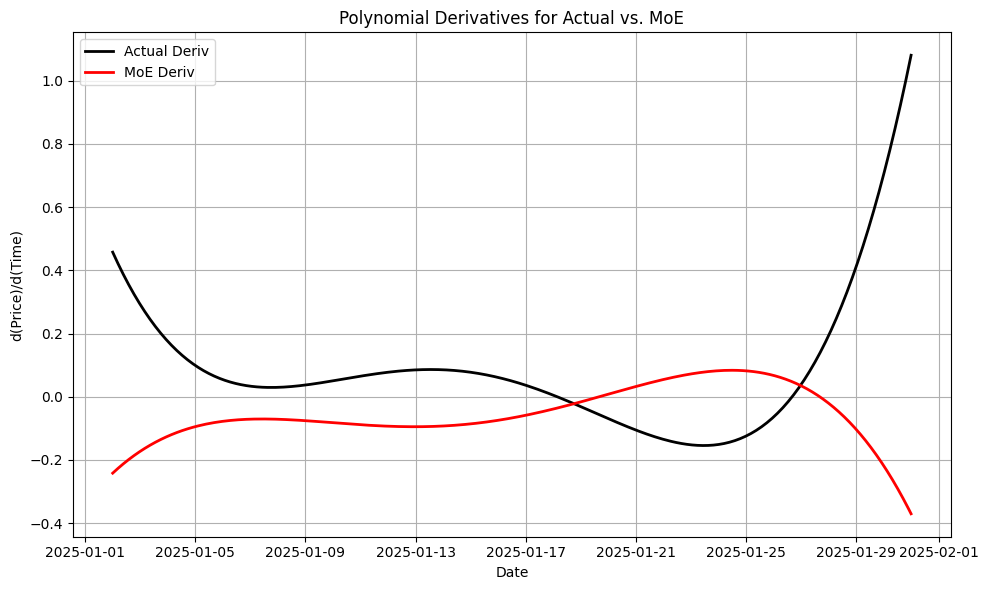

In [1]:
####################################################
# SUPER MERGED SCRIPT: Code Snippet 2 + Snippet 1
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# 0) Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# GLOBALS
############################################
BEST_MODELS_DIR = "."   # Where your best_{mt}_{YYYY-mm-dd}_V1 pt/pkl model files are
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Example cutoffs (tweak if needed to match your data)
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

############################################
# 1) Data Loading (like snippet 2 does)
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    """
    Loads two CSVs:
      1) 'train_csv': for training date range, e.g. 'Silver Futures Historical Data.csv'
      2) 'complete_csv': the entire timeline, e.g. 'Silver Futures Historical Data_Complete.csv'
    Then sorts/drops columns, fits a MinMaxScaler from the train portion,
    returns (df_sorted, df_complete, scaler).
    """
    # Load train CSV
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Simple date splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler


############################################
# 2) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)

        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)

        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


############################################
# 3) "Rolling" or "Daily" Forecast (Snippet 2 style)
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    """
    Code Snippet 2 style: For each day in date range [start_pred..end_pred],
    we "load" each model with the naming best_{mt}_{day_i}_V1,
    forecast next horizon_days, etc. Return a big DF with all predictions.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # Load each model from best_{mt}_{day_i}_V1
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        if do_daily_plots and (day_i== date_rng[-1]):
            pass  # Optionally, you can do daily plots here

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all


############################################
# 4) Mixture of Experts Computation (Snippet 2)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate), measure january performance => build table
    Code snippet 2 approach for "super advanced MoE".
    ...
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Creates the final MoE dataframe from snippet 2 approach.
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


############################################
# 5) Plot + Polynomial Fitting from Snippet 1
############################################
def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    We can display all 9 model lines + the advanced MoE in [from_d..to_d].
    Similar to snippet 2 code.
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","GPR":"teal","Boost":"purple"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()}) (Volatile MOE)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def polynomial_fitting_actual_and_moe(df_moe,
                                      csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
                                      max_degree=70):
    """
    As in snippet 1: we do polynomial fittings for "MoE" vs. "Actual"
    (like Code Snippet 1's final steps).
    """
    # Load actual data
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"]= df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename MoE
    df_moe_rename= df_moe.rename(columns={"ForecastDate":"Date","MOE_Price":"MoE"})
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # merge => columns: ["Date","MoE","Price"]
    df_merge= pd.merge(
        df_moe_rename, df_actual[["Date","Price"]],
        on="Date", how="inner"
    ).rename(columns={"Price":"Actual"})

    if df_merge.empty:
        print("No overlapping dates => cannot do polynomial fitting.")
        return

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    columns_to_fit= ["Actual","MoE"]
    df_merge["mdates_num"]= mdates.date2num(df_merge["Date"])
    n_points= len(df_merge)
    idx= np.arange(n_points)
    train_mask = (idx % 2==0)
    val_mask= ~train_mask

    best_poly_info= {}

    def format_poly(coeffs):
        terms=[]
        deg= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    # Fit polynomials
    from sklearn.metrics import mean_squared_error
    for col in columns_to_fit:
        x_train= df_merge.loc[train_mask,"mdates_num"].values
        y_train= df_merge.loc[train_mask,col].values
        x_val= df_merge.loc[val_mask,"mdates_num"].values
        y_val= df_merge.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None

        for d_ in range(1, max_degree+1):
            coefs= np.polyfit(x_train, y_train, d_)
            preds_val= np.polyval(coefs, x_val)
            mse_= mean_squared_error(y_val, preds_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        best_poly_info[col]= {"degree": best_deg, "mse":best_mse, "coeffs": best_coefs}

    # Plot the best polynomials
    plt.figure(figsize=(10,6))
    # scatter actual data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"Actual"],
                color="black", marker="x", label="Actual Val")

    # scatter MoE data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"MoE"],
                color="red", marker="o", label="MoE Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"MoE"],
                color="red", marker="x", label="MoE Val")

    x_dense= np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    color_map= {"Actual":"black","MoE":"red"}
    for col in columns_to_fit:
        info= best_poly_info[col]
        deg_= info["degree"]
        coefs_= info["coeffs"]
        color_= color_map[col] if col in color_map else "gray"
        y_dense= np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense, color=color_, linewidth=2,
                 label=f"{col} Poly (Deg={deg_})")

    plt.title("Best Polynomial Fits for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_= best_poly_info[col]["degree"]
        mse_= best_poly_info[col]["mse"]
        coefs_= best_poly_info[col]["coeffs"]
        expr_= format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # Derivative
    plt.figure(figsize=(10,6))
    for col in columns_to_fit:
        coefs_= best_poly_info[col]["coeffs"]
        d_coefs_= np.polyder(coefs_)
        d_expr_= format_poly(d_coefs_)
        y_deriv= np.polyval(d_coefs_, x_dense)

        color_ = color_map[col] if col in color_map else "gray"
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Deriv")

        print(f"=== Derivative for {col} (Degree {best_poly_info[col]['degree']-1}) ===")
        print(f"   d/dx: {d_expr_}\n")

    plt.title("Polynomial Derivatives for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 6) MAIN EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling multi-day predictions for each day,
    #    then compute the super advanced MoE.
    #    This uses snippet 2's logic.
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(40))

    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 3) Plot super advanced MoE vs. the 9 base models
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 4) Polynomial Fitting: Actual vs. MoE
    polynomial_fitting_actual_and_moe(
        df_moe,
        csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
        max_degree=70
    )


   



=== 2024-12-01 => train_cutoff=2024-07-01, val_cutoff=2024-11-30
[PyTorch] Loading LSTM => ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU => ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN => ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN => ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer => ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS => ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS => ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== 2024-12-02 => train_cutoff=2024-07-02, val_cutoff=2024-12-01
[PyTorch] Loading LSTM => ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU => ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN => ./best_RNN_2024-12-02_V1.pt
[PyTorch] Loading CNN => ./best_CNN_2024-12-02_V1.pt
[PyTorch] Loading Transformer => ./best_Transformer_2024-12-02_V1.pt
[PyTorch] Loading N-BEATS => ./best_N-BEATS_2024-12-02_V1.pt
[PyTorch]

/tmp/ipykernel_843535/3577586413.py:355: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(slope_align)
/tmp/ipykernel_843535/3577586413.py:371: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_vol).reset_index()


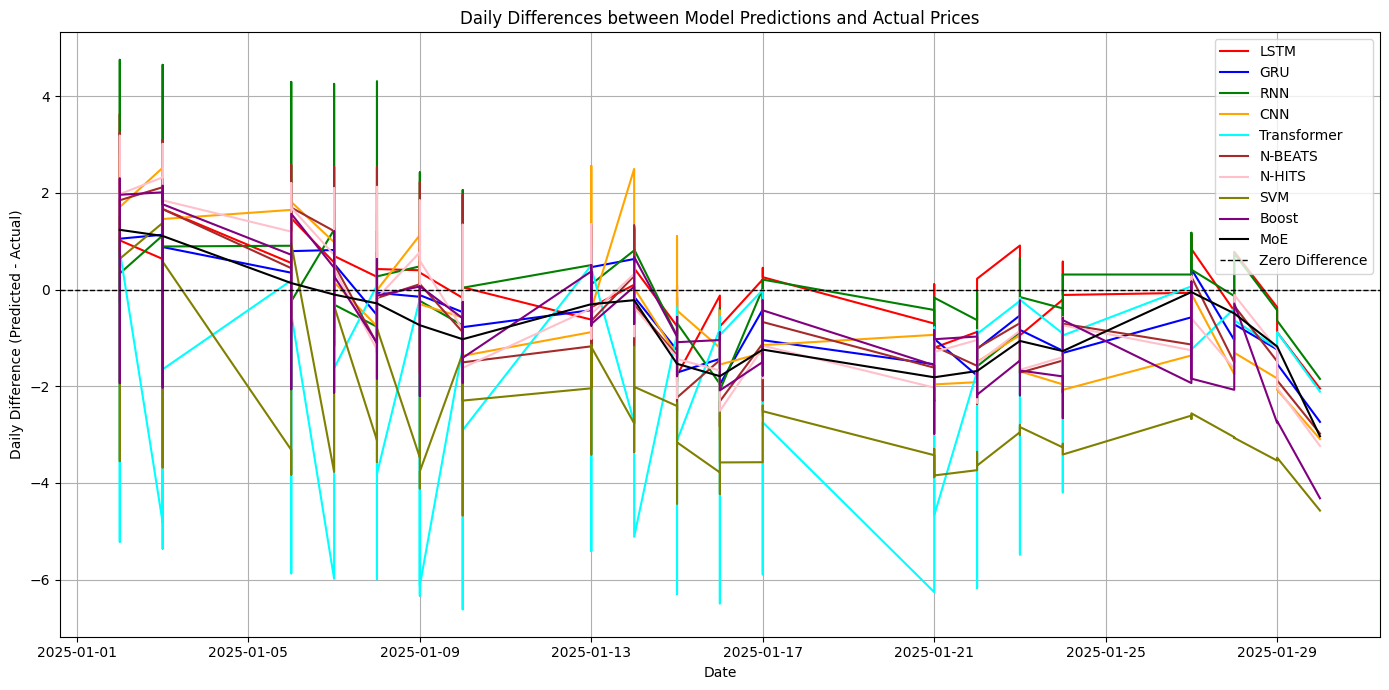

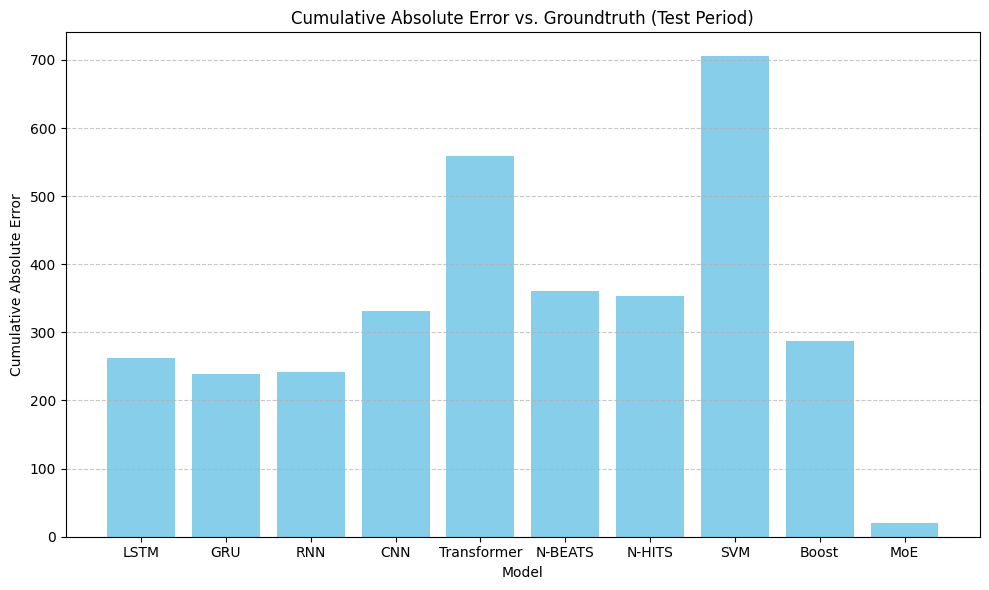

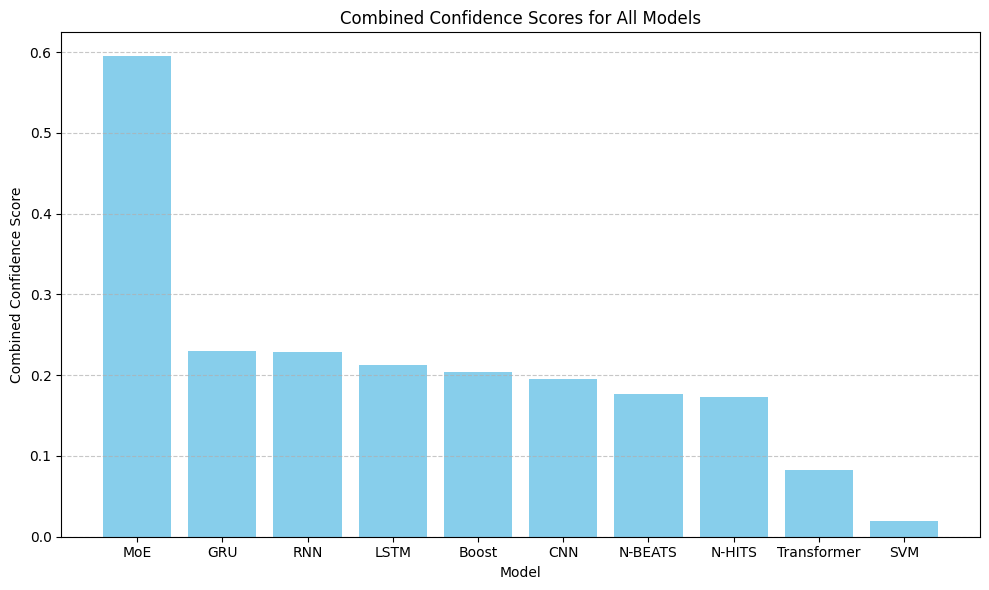


Confidence Scores for All Models:
         Model  CumulativeError  TrendMatch  ErrScore  combined_confidence
9          MoE        20.321388    0.421053  1.000000             0.594737
1          GRU       239.289428    0.037288  0.680302             0.230192
2          RNN       241.594114    0.037288  0.676937             0.229183
0         LSTM       262.478412    0.027119  0.646446             0.212917
8        Boost       287.119422    0.030508  0.610469             0.204497
3          CNN       330.769457    0.044068  0.546739             0.194869
5      N-BEATS       360.601908    0.037288  0.503183             0.177057
6       N-HITS       353.289773    0.027119  0.513859             0.173141
4  Transformer       559.484064    0.027119  0.212811             0.082826
7          SVM       705.242954    0.027119  0.000000             0.018983


In [ ]:
###################################################
# FINAL COMPLETE CODE: 
#  1) Nine base models + MoE as tenth
#  2) Loads actual from "Silver Futures Historical Data_Final Pure Predictions.csv"
#  3) Does daily differences, cumulative error, confidence, polynomial fits, etc.
###################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

########################################
# 0) Global seeds & device
########################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

########################################
# 1) Global Config
########################################
BEST_MODELS_DIR = "."  # Where your best_{ModelType}_{Date}_V1 model files live
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Example date cutoffs (adjust as needed)
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")


########################################
# 2) Read & Prepare "Actual" Test Data
########################################
def load_test_actual(csv_file="Silver Futures Historical Data_Final Pure Predictions.csv",
                     start_test=pd.to_datetime("2024-12-01")):
    """
    Reads 'Silver Futures Historical Data_Final Pure Predictions.csv' for actual 
    prices from test_cutoff onward. Returns a DataFrame with columns ["Date", "Price"].
    """
    df_act = pd.read_csv(csv_file)
    df_act["Date"] = pd.to_datetime(df_act["Date"], errors="coerce")
    # Drop columns not needed
    for col in ["Vol.","Change %"]:
        if col in df_act.columns:
            df_act.drop(columns=[col], errors="ignore", inplace=True)
    # Clean numeric columns
    if "Price" in df_act.columns:
        df_act["Price"] = df_act["Price"].astype(str).str.replace(",","",regex=True).astype(float)
    df_act.sort_values("Date", inplace=True)
    df_act.reset_index(drop=True, inplace=True)

    # Filter to test portion if you want
    df_test = df_act[df_act["Date"] >= start_test].copy()
    df_test.sort_values("Date", inplace=True)
    return df_test[["Date","Price"]].dropna(subset=["Price"])


########################################
# 3) BaseModel & SklearnWrapper
########################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type= model_type
        if model_type=="CNN":
            self.conv1= nn.Conv1d(4,64,3)
            self.conv2= nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy= torch.zeros(1,4,window_width)
                outdummy= self.conv2(F.relu(self.conv1(dummy)))
                conv_out_size= outdummy.shape[1]*outdummy.shape[2]
            self.fc= nn.Linear(conv_out_size,4)
        elif model_type=="LSTM":
            self.rnn= nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc= nn.Linear(128,4)
        elif model_type=="GRU":
            self.rnn= nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc= nn.Linear(128,4)
        elif model_type=="RNN":
            self.rnn= nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc= nn.Linear(128,4)
        elif model_type=="EnhancedLSTM":
            self.rnn= nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn= nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)
        elif model_type=="Transformer":
            self.input_linear= nn.Linear(4,128)
            enc_layer= nn.TransformerEncoderLayer(d_model=128,nhead=8,dropout=0.1)
            self.transformer_encoder= nn.TransformerEncoder(enc_layer,num_layers=3)
            self.fc= nn.Linear(128,4)
        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out,_= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out,_= self.rnn(x)
            out= out[:,-1,:]
            out= self.bn(out)
            out= self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)
            x= x.permute(1,0,2)
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast+= block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")

class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, path, window_size=35):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} => {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


########################################
# 4) Rolling Forecast => final_rolling_fc
########################################
def get_latest_window(df, current_date, window=35, scaler=None):
    mask= df["Date"]< current_date
    sub= df.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days(model, df_actual, start_date, window=35, horizon=30,
                    device=None, scaler=None, noise_std=0.01):
    """
    Forecast next horizon days starting from start_date, 
    using a rolling buffer with optional random noise for "volatility".
    """
    def add_noise_4d(arr4, std=0.01):
        noise= np.random.normal(0, std, size=arr4.shape)
        return np.clip(arr4+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= arr_window.copy()
    recs=[]
    for i in range(horizon):
        date_i= start_date + pd.Timedelta(days=i)
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        # optional noise => final
        out_noisy= add_noise_4d(out_unscaled, noise_std)
        recs.append({
            "ForecastDate": date_i,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })
        # shift the buffer
        scaled_noisy= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], scaled_noisy])

    return pd.DataFrame(recs)

def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30
):
    """
    For each day in [start_pred..end_pred], load the model file best_{mt}_{YYYY-mm-dd}_V1
    and produce horizon_days of rolling forecasts.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)
    date_rng= pd.date_range(start_pred, end_pred, freq="D")

    all_recs=[]
    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== {day_i.date()} => train_cutoff={train_cutoff_i.date()}, val_cutoff={val_cutoff_i.date()}")

        # Load each model
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, os.path.join(BEST_MODELS_DIR, out_file), window_size=WINDOW_SIZE)
            model_dict[mt]= net

        # Forecast
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days(
                model= netobj,
                df_actual= df_sorted,
                start_date= day_i,
                window= WINDOW_SIZE,
                horizon= horizon_days,
                device= device,
                scaler= scaler_obj,
                noise_std= 0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                all_recs.append(df_fc)

    if all_recs:
        df_all= pd.concat(all_recs, ignore_index=True)
        df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    else:
        df_all= pd.DataFrame()

    return df_all


########################################
# 5) Compute "Super Advanced MoE"
########################################
def build_mini_models_table(final_rolling, df_actual):
    """
    For each (model, baseDate), measure performance in [2024-12-01..2025-01-01]
    => mae, slope alignment, volatility alignment
    => used for weighting
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")

    df_jan= final_rolling[
        (final_rolling["ForecastDate"]>= start_jan)&
        (final_rolling["ForecastDate"]< end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]< end_jan)
    ].copy()
    df_act_jan.rename(columns={"Price":"ActualPrice","Date":"ForecastDate"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate", how="inner"
    )
    if df_merge.empty:
        return pd.DataFrame(), 0.01

    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"] - df_merge["ActualPrice"]).abs()
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope
    def poly_slope_diff(sub):
        sub.sort_values("ForecastDate", inplace=True)
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)<4:
            return 0.5
        coefs= polyfit(xvals,yvals, deg=2)
        y_pred= polyval(xvals, coefs)
        mse= np.mean((yvals-y_pred)**2)
        return float(np.exp(-mse))

    def slope_align(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(slope_align)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # volatility
    df_act_jan.sort_values("ForecastDate", inplace=True)
    df_act_jan["DayChange"]= df_act_jan["ActualPrice"].diff()
    real_vol= df_act_jan["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol<1e-9:
        real_vol=0.01

    def mini_vol(sub):
        sub.sort_values("ForecastDate", inplace=True)
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        v= sub["DayChange"].std(skipna=True)
        return v if not pd.isna(v) else 0.01

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_vol).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(x):
        ratio= x/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    # Merge all
    df_mm= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    df_mm= pd.merge(df_mm, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")
    if df_mm.empty:
        return df_mm, real_vol

    mae_min= df_mm["mae_jan"].min()
    mae_max= df_mm["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        df_mm["baseAcc"]=1.0
    else:
        df_mm["baseAcc"]=1.0 - ((df_mm["mae_jan"]-mae_min)/(mae_max-mae_min))
    return df_mm, real_vol

def compute_super_advanced_moe(final_rolling, df_actual):
    """
    Weighted combination => MoE from snippet 2 approach
    """
    print("\n=== SUPER ADVANCED MOE (Tenth Model) ===")
    mini_models, rv= build_mini_models_table(final_rolling, df_actual)
    if mini_models.empty:
        print("No january data => MoE empty.")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    # dict => (model,baseDate) => baseAcc, slopeAlign, volAlign
    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeA":  row["slopeAlign_jan"],
            "volA":    row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-01")
    end_moe=   pd.to_datetime("2025-01-31")
    day_rng= pd.date_range(start_moe, end_moe, freq="D")
    recs=[]

    for d in day_rng:
        df_d= final_rolling[ final_rolling["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue
        w_sum=0.0
        w_price=0.0
        ups=0
        downs=0
        total=0
        d_prev= d - pd.Timedelta(days=1)

        for _,r_ in df_d.iterrows():
            m= r_["Model"]
            bD= r_["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            sA= mm_dict[(m,bD)]["slopeA"]
            vA= mm_dict[(m,bD)]["volA"]

            # direction factor
            df_prev= final_rolling[
                (final_rolling["Model"]==m)&
                (final_rolling["BaseDate"]==bD)&
                (final_rolling["ForecastDate"]==d_prev)
            ]
            if not df_prev.empty:
                p_today= r_["Pred_Price_unscaled"]
                p_yest= df_prev["Pred_Price_unscaled"].values[0]
                if p_today> p_yest:
                    ups+=1
                    dF=1.1
                elif p_today< p_yest:
                    downs+=1
                    dF=0.9
                else:
                    dF=1.0
                total+=1
            else:
                dF=1.0

            w= baseAcc*sA*vA*dF
            w_sum+= w
            w_price+= w* r_["Pred_Price_unscaled"]

        if np.isclose(w_sum,0):
            moep= df_d["Pred_Price_unscaled"].mean()
        else:
            moep= w_price/ w_sum

        if total>0:
            frac_up= ups/ total
            frac_down= downs/ total
            if frac_up>0.7:
                moep*=1.01
            elif frac_down>0.7:
                moep*=0.99

        moep+= np.random.normal(0, moep*0.002)
        recs.append({"ForecastDate": d, "MOE_Price": moep})

    df_moe= pd.DataFrame(recs)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


########################################
# 6) Insert MoE into results_dict
########################################
def add_moe_as_10th_model(results_dict, df_moe):
    """
    Convert df_moe => "test_pred_df" for "MoE".
    """
    if df_moe.empty:
        results_dict["MoE"]={"val_pred_df":None, "test_pred_df": pd.DataFrame()}
        return
    # rename
    df_c= df_moe.copy()
    df_c.rename(columns={"ForecastDate":"Date","MOE_Price":"Pred_Price_unscaled"}, inplace=True)
    df_c["Pred_Open_unscaled"]  = df_c["Pred_Price_unscaled"]
    df_c["Pred_High_unscaled"]  = df_c["Pred_Price_unscaled"]
    df_c["Pred_Low_unscaled"]   = df_c["Pred_Price_unscaled"]
    df_c.sort_values("Date", inplace=True)
    results_dict["MoE"] = {
        "val_pred_df": None,
        "test_pred_df": df_c
    }


########################################
# 7) Plots: daily difference, cumulative error, confidence
########################################
def daily_difference_lineplot(results_dict, df_actual):
    """
    Plots daily difference = predicted - actual for all models, 
    including MoE if present.
    """
    plt.figure(figsize=(14,7))
    color_map= {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","Transformer":"cyan",
        "N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for model_name, info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        df_m= pd.merge(
            tdf[["Date","Pred_Price_unscaled"]],
            df_actual[["Date","Price"]],
            on="Date", how="inner"
        )
        if df_m.empty:
            continue
        df_m.sort_values("Date", inplace=True)
        df_m["Difference"]= df_m["Pred_Price_unscaled"] - df_m["Price"]
        clr= color_map.get(model_name,"gray")
        plt.plot(df_m["Date"], df_m["Difference"], label=model_name, color=clr)
    plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Zero Difference")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference (Predicted - Actual)")
    plt.title("Daily Differences between Model Predictions and Actual Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def cumulative_absolute_error_barplot(results_dict, df_actual):
    model_errs={}
    for mname,info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        df_merge= pd.merge(
            tdf[["Date","Pred_Price_unscaled"]],
            df_actual[["Date","Price"]],
            on="Date", how="inner"
        )
        if df_merge.empty:
            continue
        df_merge["AbsErr"]= (df_merge["Pred_Price_unscaled"] - df_merge["Price"]).abs()
        model_errs[mname]= df_merge["AbsErr"].sum()

    if not model_errs:
        print("No overlapping test data => no barplot.")
        return

    plt.figure(figsize=(10,6))
    names= list(model_errs.keys())
    vals=  [model_errs[n] for n in names]
    plt.bar(names, vals, color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Cumulative Absolute Error")
    plt.title("Cumulative Absolute Error vs. Groundtruth (Test Period)")
    plt.grid(axis="y",linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


def combined_confidence_scores(results_dict, df_actual):
    """
    For each model, measure:
      - cumulative absolute error
      - day-to-day trend match
    => 'combined_confidence' = 0.7*(trend) + 0.3*(error_score)
    Return a DataFrame.
    """
    metrics={}
    for mname,info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        df_m= pd.merge(
            tdf[["Date","Pred_Price_unscaled"]],
            df_actual[["Date","Price"]],
            on="Date", how="inner"
        )
        df_m.sort_values("Date", inplace=True)
        if df_m.empty:
            continue
        df_m["AbsErr"]= (df_m["Pred_Price_unscaled"]- df_m["Price"]).abs()
        cumerr= df_m["AbsErr"].sum()

        # trend
        df_m["ActDiff"] = df_m["Price"].diff()
        df_m["PredDiff"]= df_m["Pred_Price_unscaled"].diff()

        def same_sign(a,b):
            if a==0 and b==0:
                return True
            return np.sign(a)== np.sign(b)

        df_val= df_m.dropna(subset=["ActDiff","PredDiff"]).copy()
        if not df_val.empty:
            df_val["TrendMatch"]= df_val.apply(lambda row: 1 if same_sign(row["ActDiff"], row["PredDiff"]) else 0, axis=1)
            trend_match_rate= df_val["TrendMatch"].mean()
        else:
            trend_match_rate=0.0

        metrics[mname]= {
            "cumulative_error": cumerr,
            "trend_match": trend_match_rate
        }

    if not metrics:
        print("No valid models => no confidence scores.")
        return pd.DataFrame()

    # normalize error => err_score
    cums= [metrics[k]["cumulative_error"] for k in metrics.keys()]
    mn, mx= min(cums), max(cums)
    for k in metrics.keys():
        e= metrics[k]["cumulative_error"]
        if np.isclose(mn,mx):
            metrics[k]["err_score"]= 1.0
        else:
            metrics[k]["err_score"]= 1.0- ((e-mn)/(mx-mn))

    # combined => 0.7 * trend + 0.3 * err_score
    for k in metrics.keys():
        t_ = metrics[k]["trend_match"]
        e_ = metrics[k]["err_score"]
        cc = 0.7*t_ + 0.3* e_
        metrics[k]["combined_confidence"]= cc

    rows=[]
    for k in metrics.keys():
        rows.append({
            "Model": k,
            "CumulativeError": metrics[k]["cumulative_error"],
            "TrendMatch": metrics[k]["trend_match"],
            "ErrScore": metrics[k]["err_score"],
            "combined_confidence": metrics[k]["combined_confidence"]
        })
    df_met= pd.DataFrame(rows)
    df_met.sort_values("combined_confidence", ascending=False, inplace=True)

    plt.figure(figsize=(10,6))
    plt.bar(df_met["Model"], df_met["combined_confidence"], color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Combined Confidence Score")
    plt.title("Combined Confidence Scores for All Models")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nConfidence Scores for All Models:")
    print(df_met)
    return df_met


########################################
# 8) Polynomial Fitting for each model's test predictions
########################################
def polynomial_fitting_test_window(results_dict, df_actual):
    """
    Like snippet 1: merges each model's test predictions with actual => 
    do polyfits up to deg=35. Also includes MoE if present.
    """
    # gather test dates from df_actual
    df_test= df_actual.copy()
    df_test.sort_values("Date", inplace=True)
    df_test.rename(columns={"Price":"Actual"}, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    df_test["mdates_num"]= mdates.date2num(df_test["Date"])

    # merge each model as new column
    for mname, info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        sub= tdf[["Date","Pred_Price_unscaled"]].copy()
        sub.rename(columns={"Pred_Price_unscaled": mname}, inplace=True)
        df_test= pd.merge(df_test, sub, on="Date", how="left")

    df_test.sort_values("Date", inplace=True)
    df_test.dropna(subset=["mdates_num"], inplace=True)

    # We'll do train/val approach using even/odd index
    idx= np.arange(len(df_test))
    train_mask= (idx%2==0)
    val_mask= ~train_mask

    from sklearn.metrics import mean_squared_error
    max_deg= 35

    to_fit= [c for c in df_test.columns if c not in ["Date","mdates_num","Actual"]]
    # We'll also do "Actual" explicitly
    if "Actual" not in df_test.columns:
        print("No actual => skip poly fitting.")
        return
    to_fit= ["Actual"]+ to_fit

    best_poly= {}

    def format_poly(coeffs):
        terms=[]
        d= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= d-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    for col in to_fit:
        # skip columns if all NaN
        if df_test[col].notna().sum()<5:
            continue
        sub= df_test.dropna(subset=["mdates_num", col])
        if len(sub)<10:
            continue
        x_tr= sub.loc[train_mask, "mdates_num"].values
        y_tr= sub.loc[train_mask, col].values
        x_vl= sub.loc[val_mask, "mdates_num"].values
        y_vl= sub.loc[val_mask, col].values

        best_d= None
        best_mse= 9e15
        best_coefs= None
        for d_ in range(1, max_deg+1):
            coefs= np.polyfit(x_tr, y_tr, d_)
            pred_val= np.polyval(coefs, x_vl)
            mse_= mean_squared_error(y_vl, pred_val)
            if mse_< best_mse:
                best_mse= mse_
                best_d= d_
                best_coefs= coefs
        if best_d is not None:
            best_poly[col]= {"degree": best_d, "mse": best_mse, "coeffs": best_coefs}

    # Plot the polynomials
    plt.figure(figsize=(12,8))
    # scatter actual
    if "Actual" in df_test.columns:
        plt.scatter(df_test.loc[train_mask,"Date"], df_test.loc[train_mask,"Actual"],
                    color="black", marker="o", label="Actual(Train)")
        plt.scatter(df_test.loc[val_mask,"Date"], df_test.loc[val_mask,"Actual"],
                    color="black", marker="x", label="Actual(Val)")

    x_dense= np.linspace(df_test["mdates_num"].min(), df_test["mdates_num"].max(), 300)
    x_dates= [mdates.num2date(xx) for xx in x_dense]
    color_cycle= ["red","blue","green","orange","magenta","cyan","brown","pink","olive","teal","purple","gray"]
    cidx=0

    for col in to_fit:
        if col not in best_poly:
            continue
        coefs_= best_poly[col]["coeffs"]
        deg_  = best_poly[col]["degree"]
        color_= color_cycle[cidx%len(color_cycle)]
        cidx+=1
        y_dense= np.polyval(coefs_, x_dense)
        plt.plot(x_dates, y_dense, color=color_, linewidth=2, label=f"{col} Poly(Deg={deg_})")

    plt.title("Best Polynomial Fits (Test Window): Actual vs. Model Predictions of Silver Futures")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting ===")
    for col in to_fit:
        if col in best_poly:
            d_  = best_poly[col]["degree"]
            ms_ = best_poly[col]["mse"]
            expr= format_poly(best_poly[col]["coeffs"])
            print(f"[{col}] => deg={d_}, MSE={ms_:.4f}")
            print(f"       y={expr}\n")

    # Derivatives
    plt.figure(figsize=(12,8))
    cidx=0
    for col in to_fit:
        if col not in best_poly:
            continue
        coefs_= best_poly[col]["coeffs"]
        d_coefs_= np.polyder(coefs_)
        color_= color_cycle[cidx%len(color_cycle)]
        cidx+=1
        y_deriv= np.polyval(d_coefs_, x_dense)
        plt.plot(x_dates, y_deriv, color=color_, linewidth=2,
                 label=f"{col} Deriv (Deg {len(d_coefs_)-1})")

    plt.title("Polynomial Derivative Curves (Test Window) - Silver Futures")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


########################################
# 9) MAIN
########################################
if __name__=="__main__":
    # Step A) Read the actual test data from the "Final Pure Predictions" CSV
    df_test_actual = load_test_actual(
        csv_file="Silver Futures Historical Data_Final Pure Predictions.csv",
        start_test=test_cutoff
    )
    # Step B) Also read the complete CSV for your rolling approach if needed:
    df_full_all = pd.read_csv("Silver Futures Historical Data_Complete.csv")
    df_full_all["Date"] = pd.to_datetime(df_full_all["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_full_all.columns:
            df_full_all.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_full_all[feat] = df_full_all[feat].astype(str).str.replace(",","",regex=True).astype(float)
    df_full_all.sort_values("Date", inplace=True)
    df_full_all.reset_index(drop=True, inplace=True)

    # Step C) Fit a scaler on the "training portion" of the same file if needed
    #         or skip if you have separate training CSV. We'll do a minimal approach:
    df_train_only= df_full_all[df_full_all["Date"]< train_cutoff].dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_train_only.empty:
        scaler.fit(df_train_only[features])

    # Step D) Rolling predictions for 9 base models
    base_models= ["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"]
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full=df_full_all,
        scaler_obj=scaler,
        model_types=base_models,
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=test_cutoff,          # e.g. "2024-12-01"
        end_pred=pd.to_datetime("2025-01-01"),
        horizon_days=30
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(20))

    # Step E) Compute the "MoE"
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_full_all)  # unscaled data

    # Step F) Build results_dict for all 9 + MoE => each with test_pred_df
    results_dict={}
    for mt in base_models:
        sub= final_rolling_fc[ final_rolling_fc["Model"]==mt ].copy()
        if sub.empty:
            results_dict[mt]={"val_pred_df":None, "test_pred_df": pd.DataFrame()}
            continue
        # rename ForecastDate => Date
        sub.rename(columns={"ForecastDate":"Date"}, inplace=True)
        sub.sort_values("Date", inplace=True)
        results_dict[mt]={
            "val_pred_df": None,
            "test_pred_df": sub[["Date","Pred_Price_unscaled","Pred_Open_unscaled","Pred_High_unscaled","Pred_Low_unscaled"]]
        }

    # Insert MoE
    add_moe_as_10th_model(results_dict, df_moe)

    # Step G) Plot daily differences, cumulative error, confidence, etc. 
    daily_difference_lineplot(results_dict, df_test_actual)
    cumulative_absolute_error_barplot(results_dict, df_test_actual)
    df_conf= combined_confidence_scores(results_dict, df_test_actual)
    # Step H) Polynomial fit
    polynomial_fitting_test_window(results_dict, df_test_actual)

    print("\nAll done with 9 base models + MoE as the tenth. Enjoy!\n")


In [ ]:
###################################################
# FINAL COMPLETE CODE: 
#  1) Nine base models + MoE as tenth
#  2) Loads actual from "Silver Futures Historical Data_Final Pure Predictions.csv"
#  3) Does daily differences, cumulative error, confidence, polynomial fits, etc.
###################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

########################################
# 0) Global seeds & device
########################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

########################################
# 1) Global Config
########################################
BEST_MODELS_DIR = "."  # Where your best_{ModelType}_{Date}_V1 model files live
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Example date cutoffs (adjust as needed)
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")


########################################
# 2) Read & Prepare "Actual" Test Data
########################################
def load_test_actual(csv_file="Silver Futures Historical Data_Final Pure Predictions.csv",
                     start_test=pd.to_datetime("2024-12-01")):
    """
    Reads 'Silver Futures Historical Data_Final Pure Predictions.csv' for actual 
    prices from test_cutoff onward. Returns a DataFrame with columns ["Date", "Price"].
    """
    df_act = pd.read_csv(csv_file)
    df_act["Date"] = pd.to_datetime(df_act["Date"], errors="coerce")
    # Drop columns not needed
    for col in ["Vol.","Change %"]:
        if col in df_act.columns:
            df_act.drop(columns=[col], errors="ignore", inplace=True)
    # Clean numeric columns
    if "Price" in df_act.columns:
        df_act["Price"] = df_act["Price"].astype(str).str.replace(",","",regex=True).astype(float)
    df_act.sort_values("Date", inplace=True)
    df_act.reset_index(drop=True, inplace=True)

    # Filter to test portion if you want
    df_test = df_act[df_act["Date"] >= start_test].copy()
    df_test.sort_values("Date", inplace=True)
    return df_test[["Date","Price"]].dropna(subset=["Price"])


########################################
# 3) BaseModel & SklearnWrapper
########################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type= model_type
        if model_type=="CNN":
            self.conv1= nn.Conv1d(4,64,3)
            self.conv2= nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy= torch.zeros(1,4,window_width)
                outdummy= self.conv2(F.relu(self.conv1(dummy)))
                conv_out_size= outdummy.shape[1]*outdummy.shape[2]
            self.fc= nn.Linear(conv_out_size,4)
        elif model_type=="LSTM":
            self.rnn= nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc= nn.Linear(128,4)
        elif model_type=="GRU":
            self.rnn= nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc= nn.Linear(128,4)
        elif model_type=="RNN":
            self.rnn= nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc= nn.Linear(128,4)
        elif model_type=="EnhancedLSTM":
            self.rnn= nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn= nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)
        elif model_type=="Transformer":
            self.input_linear= nn.Linear(4,128)
            enc_layer= nn.TransformerEncoderLayer(d_model=128,nhead=8,dropout=0.1)
            self.transformer_encoder= nn.TransformerEncoder(enc_layer,num_layers=3)
            self.fc= nn.Linear(128,4)
        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out,_= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out,_= self.rnn(x)
            out= out[:,-1,:]
            out= self.bn(out)
            out= self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)
            x= x.permute(1,0,2)
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast+= block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")

class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, path, window_size=35):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} => {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


########################################
# 4) Rolling Forecast => final_rolling_fc
########################################
def get_latest_window(df, current_date, window=35, scaler=None):
    mask= df["Date"]< current_date
    sub= df.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days(model, df_actual, start_date, window=35, horizon=30,
                    device=None, scaler=None, noise_std=0.01):
    """
    Forecast next horizon days starting from start_date, 
    using a rolling buffer with optional random noise for "volatility".
    """
    def add_noise_4d(arr4, std=0.01):
        noise= np.random.normal(0, std, size=arr4.shape)
        return np.clip(arr4+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= arr_window.copy()
    recs=[]
    for i in range(horizon):
        date_i= start_date + pd.Timedelta(days=i)
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        # optional noise => final
        out_noisy= add_noise_4d(out_unscaled, noise_std)
        recs.append({
            "ForecastDate": date_i,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })
        # shift the buffer
        scaled_noisy= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], scaled_noisy])

    return pd.DataFrame(recs)

def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30
):
    """
    For each day in [start_pred..end_pred], load the model file best_{mt}_{YYYY-mm-dd}_V1
    and produce horizon_days of rolling forecasts.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)
    date_rng= pd.date_range(start_pred, end_pred, freq="D")

    all_recs=[]
    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== {day_i.date()} => train_cutoff={train_cutoff_i.date()}, val_cutoff={val_cutoff_i.date()}")

        # Load each model
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, os.path.join(BEST_MODELS_DIR, out_file), window_size=WINDOW_SIZE)
            model_dict[mt]= net

        # Forecast
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days(
                model= netobj,
                df_actual= df_sorted,
                start_date= day_i,
                window= WINDOW_SIZE,
                horizon= horizon_days,
                device= device,
                scaler= scaler_obj,
                noise_std= 0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                all_recs.append(df_fc)

    if all_recs:
        df_all= pd.concat(all_recs, ignore_index=True)
        df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    else:
        df_all= pd.DataFrame()

    return df_all


########################################
# 5) Compute "Super Advanced MoE"
########################################
def build_mini_models_table(final_rolling, df_actual):
    """
    For each (model, baseDate), measure performance in [2024-12-01..2025-01-01]
    => mae, slope alignment, volatility alignment
    => used for weighting
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")

    df_jan= final_rolling[
        (final_rolling["ForecastDate"]>= start_jan)&
        (final_rolling["ForecastDate"]< end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]< end_jan)
    ].copy()
    df_act_jan.rename(columns={"Price":"ActualPrice","Date":"ForecastDate"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate", how="inner"
    )
    if df_merge.empty:
        return pd.DataFrame(), 0.01

    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"] - df_merge["ActualPrice"]).abs()
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope
    def poly_slope_diff(sub):
        sub.sort_values("ForecastDate", inplace=True)
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)<4:
            return 0.5
        coefs= polyfit(xvals,yvals, deg=2)
        y_pred= polyval(xvals, coefs)
        mse= np.mean((yvals-y_pred)**2)
        return float(np.exp(-mse))

    def slope_align(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(slope_align)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # volatility
    df_act_jan.sort_values("ForecastDate", inplace=True)
    df_act_jan["DayChange"]= df_act_jan["ActualPrice"].diff()
    real_vol= df_act_jan["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol<1e-9:
        real_vol=0.01

    def mini_vol(sub):
        sub.sort_values("ForecastDate", inplace=True)
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        v= sub["DayChange"].std(skipna=True)
        return v if not pd.isna(v) else 0.01

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_vol).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(x):
        ratio= x/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    # Merge all
    df_mm= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    df_mm= pd.merge(df_mm, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")
    if df_mm.empty:
        return df_mm, real_vol

    mae_min= df_mm["mae_jan"].min()
    mae_max= df_mm["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        df_mm["baseAcc"]=1.0
    else:
        df_mm["baseAcc"]=1.0 - ((df_mm["mae_jan"]-mae_min)/(mae_max-mae_min))
    return df_mm, real_vol

def compute_super_advanced_moe(final_rolling, df_actual):
    """
    Weighted combination => MoE from snippet 2 approach
    """
    print("\n=== SUPER ADVANCED MOE (Tenth Model) ===")
    mini_models, rv= build_mini_models_table(final_rolling, df_actual)
    if mini_models.empty:
        print("No january data => MoE empty.")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    # dict => (model,baseDate) => baseAcc, slopeAlign, volAlign
    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeA":  row["slopeAlign_jan"],
            "volA":    row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-01")
    end_moe=   pd.to_datetime("2025-01-31")
    day_rng= pd.date_range(start_moe, end_moe, freq="D")
    recs=[]

    for d in day_rng:
        df_d= final_rolling[ final_rolling["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue
        w_sum=0.0
        w_price=0.0
        ups=0
        downs=0
        total=0
        d_prev= d - pd.Timedelta(days=1)

        for _,r_ in df_d.iterrows():
            m= r_["Model"]
            bD= r_["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            sA= mm_dict[(m,bD)]["slopeA"]
            vA= mm_dict[(m,bD)]["volA"]

            # direction factor
            df_prev= final_rolling[
                (final_rolling["Model"]==m)&
                (final_rolling["BaseDate"]==bD)&
                (final_rolling["ForecastDate"]==d_prev)
            ]
            if not df_prev.empty:
                p_today= r_["Pred_Price_unscaled"]
                p_yest= df_prev["Pred_Price_unscaled"].values[0]
                if p_today> p_yest:
                    ups+=1
                    dF=1.1
                elif p_today< p_yest:
                    downs+=1
                    dF=0.9
                else:
                    dF=1.0
                total+=1
            else:
                dF=1.0

            w= baseAcc*sA*vA*dF
            w_sum+= w
            w_price+= w* r_["Pred_Price_unscaled"]

        if np.isclose(w_sum,0):
            moep= df_d["Pred_Price_unscaled"].mean()
        else:
            moep= w_price/ w_sum

        if total>0:
            frac_up= ups/ total
            frac_down= downs/ total
            if frac_up>0.7:
                moep*=1.01
            elif frac_down>0.7:
                moep*=0.99

        moep+= np.random.normal(0, moep*0.002)
        recs.append({"ForecastDate": d, "MOE_Price": moep})

    df_moe= pd.DataFrame(recs)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


########################################
# 6) Insert MoE into results_dict
########################################
def add_moe_as_10th_model(results_dict, df_moe):
    """
    Convert df_moe => "test_pred_df" for "MoE".
    """
    if df_moe.empty:
        results_dict["MoE"]={"val_pred_df":None, "test_pred_df": pd.DataFrame()}
        return
    # rename
    df_c= df_moe.copy()
    df_c.rename(columns={"ForecastDate":"Date","MOE_Price":"Pred_Price_unscaled"}, inplace=True)
    df_c["Pred_Open_unscaled"]  = df_c["Pred_Price_unscaled"]
    df_c["Pred_High_unscaled"]  = df_c["Pred_Price_unscaled"]
    df_c["Pred_Low_unscaled"]   = df_c["Pred_Price_unscaled"]
    df_c.sort_values("Date", inplace=True)
    results_dict["MoE"] = {
        "val_pred_df": None,
        "test_pred_df": df_c
    }


########################################
# 7) Plots: daily difference, cumulative error, confidence
########################################
def daily_difference_lineplot(results_dict, df_actual):
    """
    Plots daily difference = predicted - actual for all models, 
    including MoE if present.
    """
    plt.figure(figsize=(14,7))
    color_map= {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","Transformer":"cyan",
        "N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for model_name, info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        df_m= pd.merge(
            tdf[["Date","Pred_Price_unscaled"]],
            df_actual[["Date","Price"]],
            on="Date", how="inner"
        )
        if df_m.empty:
            continue
        df_m.sort_values("Date", inplace=True)
        df_m["Difference"]= df_m["Pred_Price_unscaled"] - df_m["Price"]
        clr= color_map.get(model_name,"gray")
        plt.plot(df_m["Date"], df_m["Difference"], label=model_name, color=clr)
    plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Zero Difference")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference (Predicted - Actual)")
    plt.title("Daily Differences between Model Predictions and Actual Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def cumulative_absolute_error_barplot(results_dict, df_actual):
    model_errs={}
    for mname,info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        df_merge= pd.merge(
            tdf[["Date","Pred_Price_unscaled"]],
            df_actual[["Date","Price"]],
            on="Date", how="inner"
        )
        if df_merge.empty:
            continue
        df_merge["AbsErr"]= (df_merge["Pred_Price_unscaled"] - df_merge["Price"]).abs()
        model_errs[mname]= df_merge["AbsErr"].sum()

    if not model_errs:
        print("No overlapping test data => no barplot.")
        return

    plt.figure(figsize=(10,6))
    names= list(model_errs.keys())
    vals=  [model_errs[n] for n in names]
    plt.bar(names, vals, color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Cumulative Absolute Error")
    plt.title("Cumulative Absolute Error vs. Groundtruth (Test Period)")
    plt.grid(axis="y",linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


def combined_confidence_scores(results_dict, df_actual):
    """
    For each model, measure:
      - cumulative absolute error
      - day-to-day trend match
    => 'combined_confidence' = 0.7*(trend) + 0.3*(error_score)
    Return a DataFrame.
    """
    metrics={}
    for mname,info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        df_m= pd.merge(
            tdf[["Date","Pred_Price_unscaled"]],
            df_actual[["Date","Price"]],
            on="Date", how="inner"
        )
        df_m.sort_values("Date", inplace=True)
        if df_m.empty:
            continue
        df_m["AbsErr"]= (df_m["Pred_Price_unscaled"]- df_m["Price"]).abs()
        cumerr= df_m["AbsErr"].sum()

        # trend
        df_m["ActDiff"] = df_m["Price"].diff()
        df_m["PredDiff"]= df_m["Pred_Price_unscaled"].diff()

        def same_sign(a,b):
            if a==0 and b==0:
                return True
            return np.sign(a)== np.sign(b)

        df_val= df_m.dropna(subset=["ActDiff","PredDiff"]).copy()
        if not df_val.empty:
            df_val["TrendMatch"]= df_val.apply(lambda row: 1 if same_sign(row["ActDiff"], row["PredDiff"]) else 0, axis=1)
            trend_match_rate= df_val["TrendMatch"].mean()
        else:
            trend_match_rate=0.0

        metrics[mname]= {
            "cumulative_error": cumerr,
            "trend_match": trend_match_rate
        }

    if not metrics:
        print("No valid models => no confidence scores.")
        return pd.DataFrame()

    # normalize error => err_score
    cums= [metrics[k]["cumulative_error"] for k in metrics.keys()]
    mn, mx= min(cums), max(cums)
    for k in metrics.keys():
        e= metrics[k]["cumulative_error"]
        if np.isclose(mn,mx):
            metrics[k]["err_score"]= 1.0
        else:
            metrics[k]["err_score"]= 1.0- ((e-mn)/(mx-mn))

    # combined => 0.7 * trend + 0.3 * err_score
    for k in metrics.keys():
        t_ = metrics[k]["trend_match"]
        e_ = metrics[k]["err_score"]
        cc = 0.7*t_ + 0.3* e_
        metrics[k]["combined_confidence"]= cc

    rows=[]
    for k in metrics.keys():
        rows.append({
            "Model": k,
            "CumulativeError": metrics[k]["cumulative_error"],
            "TrendMatch": metrics[k]["trend_match"],
            "ErrScore": metrics[k]["err_score"],
            "combined_confidence": metrics[k]["combined_confidence"]
        })
    df_met= pd.DataFrame(rows)
    df_met.sort_values("combined_confidence", ascending=False, inplace=True)

    plt.figure(figsize=(10,6))
    plt.bar(df_met["Model"], df_met["combined_confidence"], color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Combined Confidence Score")
    plt.title("Combined Confidence Scores for All Models")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nConfidence Scores for All Models:")
    print(df_met)
    return df_met


########################################
# 8) Polynomial Fitting for each model's test predictions
########################################
def polynomial_fitting_test_window(results_dict, df_actual):
    """
    Like snippet 1: merges each model's test predictions with actual => 
    do polyfits up to deg=35. Also includes MoE if present.
    """
    # gather test dates from df_actual
    df_test= df_actual.copy()
    df_test.sort_values("Date", inplace=True)
    df_test.rename(columns={"Price":"Actual"}, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    df_test["mdates_num"]= mdates.date2num(df_test["Date"])

    # merge each model as new column
    for mname, info in results_dict.items():
        tdf= info["test_pred_df"]
        if tdf is None or tdf.empty:
            continue
        sub= tdf[["Date","Pred_Price_unscaled"]].copy()
        sub.rename(columns={"Pred_Price_unscaled": mname}, inplace=True)
        df_test= pd.merge(df_test, sub, on="Date", how="left")

    df_test.sort_values("Date", inplace=True)
    df_test.dropna(subset=["mdates_num"], inplace=True)

    # We'll do train/val approach using even/odd index
    idx= np.arange(len(df_test))
    train_mask= (idx%2==0)
    val_mask= ~train_mask

    from sklearn.metrics import mean_squared_error
    max_deg= 35

    to_fit= [c for c in df_test.columns if c not in ["Date","mdates_num","Actual"]]
    # We'll also do "Actual" explicitly
    if "Actual" not in df_test.columns:
        print("No actual => skip poly fitting.")
        return
    to_fit= ["Actual"]+ to_fit

    best_poly= {}

    def format_poly(coeffs):
        terms=[]
        d= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= d-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    for col in to_fit:
        # skip columns if all NaN
        if df_test[col].notna().sum()<5:
            continue
        sub= df_test.dropna(subset=["mdates_num", col])
        if len(sub)<10:
            continue
        x_tr= sub.loc[train_mask, "mdates_num"].values
        y_tr= sub.loc[train_mask, col].values
        x_vl= sub.loc[val_mask, "mdates_num"].values
        y_vl= sub.loc[val_mask, col].values

        best_d= None
        best_mse= 9e15
        best_coefs= None
        for d_ in range(1, max_deg+1):
            coefs= np.polyfit(x_tr, y_tr, d_)
            pred_val= np.polyval(coefs, x_vl)
            mse_= mean_squared_error(y_vl, pred_val)
            if mse_< best_mse:
                best_mse= mse_
                best_d= d_
                best_coefs= coefs
        if best_d is not None:
            best_poly[col]= {"degree": best_d, "mse": best_mse, "coeffs": best_coefs}

    # Plot the polynomials
    plt.figure(figsize=(12,8))
    # scatter actual
    if "Actual" in df_test.columns:
        plt.scatter(df_test.loc[train_mask,"Date"], df_test.loc[train_mask,"Actual"],
                    color="black", marker="o", label="Actual(Train)")
        plt.scatter(df_test.loc[val_mask,"Date"], df_test.loc[val_mask,"Actual"],
                    color="black", marker="x", label="Actual(Val)")

    x_dense= np.linspace(df_test["mdates_num"].min(), df_test["mdates_num"].max(), 300)
    x_dates= [mdates.num2date(xx) for xx in x_dense]
    color_cycle= ["red","blue","green","orange","magenta","cyan","brown","pink","olive","teal","purple","gray"]
    cidx=0

    for col in to_fit:
        if col not in best_poly:
            continue
        coefs_= best_poly[col]["coeffs"]
        deg_  = best_poly[col]["degree"]
        color_= color_cycle[cidx%len(color_cycle)]
        cidx+=1
        y_dense= np.polyval(coefs_, x_dense)
        plt.plot(x_dates, y_dense, color=color_, linewidth=2, label=f"{col} Poly(Deg={deg_})")

    plt.title("Best Polynomial Fits (Test Window): Actual vs. Model Predictions of Silver Futures")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting ===")
    for col in to_fit:
        if col in best_poly:
            d_  = best_poly[col]["degree"]
            ms_ = best_poly[col]["mse"]
            expr= format_poly(best_poly[col]["coeffs"])
            print(f"[{col}] => deg={d_}, MSE={ms_:.4f}")
            print(f"       y={expr}\n")

    # Derivatives
    plt.figure(figsize=(12,8))
    cidx=0
    for col in to_fit:
        if col not in best_poly:
            continue
        coefs_= best_poly[col]["coeffs"]
        d_coefs_= np.polyder(coefs_)
        color_= color_cycle[cidx%len(color_cycle)]
        cidx+=1
        y_deriv= np.polyval(d_coefs_, x_dense)
        plt.plot(x_dates, y_deriv, color=color_, linewidth=2,
                 label=f"{col} Deriv (Deg {len(d_coefs_)-1})")

    plt.title("Polynomial Derivative Curves (Test Window) - Silver Futures")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


########################################
# 9) MAIN
########################################
if __name__=="__main__":
    # Step A) Read the actual test data from the "Final Pure Predictions" CSV
    df_test_actual = load_test_actual(
        csv_file="Silver Futures Historical Data_Final Pure Predictions.csv",
        start_test=test_cutoff
    )
    # Step B) Also read the complete CSV for your rolling approach if needed:
    df_full_all = pd.read_csv("Silver Futures Historical Data_Complete.csv")
    df_full_all["Date"] = pd.to_datetime(df_full_all["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_full_all.columns:
            df_full_all.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_full_all[feat] = df_full_all[feat].astype(str).str.replace(",","",regex=True).astype(float)
    df_full_all.sort_values("Date", inplace=True)
    df_full_all.reset_index(drop=True, inplace=True)

    # Step C) Fit a scaler on the "training portion" of the same file if needed
    #         or skip if you have separate training CSV. We'll do a minimal approach:
    df_train_only= df_full_all[df_full_all["Date"]< train_cutoff].dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_train_only.empty:
        scaler.fit(df_train_only[features])

    # Step D) Rolling predictions for 9 base models
    base_models= ["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"]
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full=df_full_all,
        scaler_obj=scaler,
        model_types=base_models,
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=test_cutoff,          # e.g. "2024-12-01"
        end_pred=pd.to_datetime("2025-01-01"),
        horizon_days=30
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(20))

    # Step E) Compute the "MoE"
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_full_all)  # unscaled data

    # Step F) Build results_dict for all 9 + MoE => each with test_pred_df
    results_dict={}
    for mt in base_models:
        sub= final_rolling_fc[ final_rolling_fc["Model"]==mt ].copy()
        if sub.empty:
            results_dict[mt]={"val_pred_df":None, "test_pred_df": pd.DataFrame()}
            continue
        # rename ForecastDate => Date
        sub.rename(columns={"ForecastDate":"Date"}, inplace=True)
        sub.sort_values("Date", inplace=True)
        results_dict[mt]={
            "val_pred_df": None,
            "test_pred_df": sub[["Date","Pred_Price_unscaled","Pred_Open_unscaled","Pred_High_unscaled","Pred_Low_unscaled"]]
        }

    # Insert MoE
    add_moe_as_10th_model(results_dict, df_moe)

    # Step G) Plot daily differences, cumulative error, confidence, etc. 
    daily_difference_lineplot(results_dict, df_test_actual)
    cumulative_absolute_error_barplot(results_dict, df_test_actual)
    df_conf= combined_confidence_scores(results_dict, df_test_actual)
    # Step H) Polynomial fit
    polynomial_fitting_test_window(results_dict, df_test_actual)

    print("\nAll done with 9 base models + MoE as the tenth. Enjoy!\n")
